In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [135]:
train_data = datasets.MNIST(root='./data', train=True, download=True)
test_data = datasets.MNIST(root='./data', train=False, download=True)

In [136]:
type(train_data[0][0])

PIL.Image.Image

In [ ]:
trans = transforms.Compose(
	[	
		transforms.ToTensor()
	]
)

In [138]:
image1 = train_data[0][0]
label1 = train_data[0][1]

In [139]:
image1

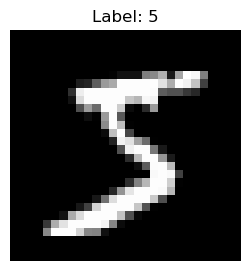

In [140]:
image1_tensor = trans(image1)
plt.figure(figsize=(3, 3))
plt.imshow(image1_tensor.squeeze().numpy(), cmap='gray')
plt.title(f"Label: {label1}")
plt.axis('off')

plt.show()

In [141]:
trainData = datasets.MNIST(root='./data', train=True, transform=trans)
testData = datasets.MNIST(root='./data', train=False, transform=trans)

In [142]:
trainData[0][0].shape

torch.Size([1, 28, 28])

In [143]:
batch_size = 128
trainLoader = DataLoader(trainData, shuffle=True, batch_size=batch_size)
testLoader = DataLoader(testData, batch_size=batch_size)

In [ ]:
input_size = 28 * 28
hidden_size1 = 256
hidden_size2 = 128
output_size = 10

W1 = torch.normal(0, 1, (input_size, hidden_size1), requires_grad=True)
W2 = torch.normal(0, 1, (hidden_size1, hidden_size2), requires_grad=True)
W3 = torch.normal(0, 1, (hidden_size2, output_size), requires_grad=True)

bias1 = torch.zeros(hidden_size1, requires_grad=True)
bias2 = torch.zeros(hidden_size2, requires_grad=True)
bias3 = torch.zeros(output_size, requires_grad=True)

epochs = 20
lr = 1e-3

trainLossList = []
trainACCList = []
testLossList = []
testACCList = []
for epoch in range(epochs):
	trainLossSum = 0
	trainACCSum = 0
	train_batch_cnt = 0
	train_sample_cnt = 0
	for X, y in trainLoader:
		train_batch_cnt += 1
		train_sample_cnt += len(X)
		X = X.squeeze().reshape([-1, 28 * 28])
		y_hat = F.relu(X @ W1 + bias1)
		y_hat = F.relu(y_hat @ W2 + bias2)
		y_hat = y_hat @ W3 + bias3
		
		loss = F.cross_entropy(y_hat, y, reduction='mean')

		loss.backward()
		with torch.no_grad():
			W1 += - lr * W1.grad
			W3 += - lr * W3.grad
			W2 += - lr * W2.grad
		
		W1.grad.zero_()
		W2.grad.zero_()
		W3.grad.zero_()
		
		trainLossSum += loss.item()
		trainACCSum += (y_hat.argmax(dim=1) == y).sum().item()

	trainLossList.append(trainLossSum / train_batch_cnt)
	trainACCList.append(trainACCSum / train_sample_cnt)

	with torch.no_grad():
		testLossSum = 0
		testACCSum = 0
		test_batch_cnt = 0
		test_sample_cnt = 0
		for X, y in testLoader:
			test_batch_cnt += 1
			test_sample_cnt += len(X)
			X = X.squeeze().reshape([-1, 28 * 28])
			y_hat = F.relu(X @ W1 + bias1)
			y_hat = F.relu(y_hat @ W2 + bias2)
			y_hat = y_hat @ W3 + bias3
			
			loss = F.cross_entropy(y_hat, y, reduction='mean')

			testLossSum += loss.item()
			testACCSum += (y_hat.argmax(dim=1) == y).sum().item()

	testLossList.append(testLossSum / test_batch_cnt)
	testACCList.append(testACCSum / test_sample_cnt)

	print(f"Epoch: {epoch + 1}\tTrain Loss: {trainLossSum / train_batch_cnt: .4f}\tTest Loss: {testLossSum / test_batch_cnt: .4f}\t \
	   Train ACC: {trainACCSum / train_sample_cnt: .4f}\tTest ACC: {testACCSum / test_sample_cnt: .4f}")
		



Epoch: 1	Train Loss:  142.3055	Test Loss:  57.1239	 	   Train ACC:  0.6107	Test ACC:  0.7661
Epoch: 2	Train Loss:  49.9299	Test Loss:  38.6714	 	   Train ACC:  0.7820	Test ACC:  0.8123
Epoch: 3	Train Loss:  36.5422	Test Loss:  30.9498	 	   Train ACC:  0.8161	Test ACC:  0.8314
Epoch: 4	Train Loss:  29.4334	Test Loss:  26.5675	 	   Train ACC:  0.8348	Test ACC:  0.8415
Epoch: 5	Train Loss:  24.8245	Test Loss:  23.0006	 	   Train ACC:  0.8472	Test ACC:  0.8529
Epoch: 6	Train Loss:  21.5814	Test Loss:  20.4432	 	   Train ACC:  0.8555	Test ACC:  0.8586
Epoch: 7	Train Loss:  19.1194	Test Loss:  18.3853	 	   Train ACC:  0.8614	Test ACC:  0.8620
Epoch: 8	Train Loss:  17.1564	Test Loss:  16.8187	 	   Train ACC:  0.8662	Test ACC:  0.8654
Epoch: 9	Train Loss:  15.5498	Test Loss:  15.6127	 	   Train ACC:  0.8701	Test ACC:  0.8699
Epoch: 10	Train Loss:  14.2285	Test Loss:  14.4386	 	   Train ACC:  0.8736	Test ACC:  0.8725
Epoch: 11	Train Loss:  13.1170	Test Loss:  13.6786	 	   Train ACC:  0.8778	Tes

In [ ]:
input_size = 28 * 28
hidden_size1 = 256
hidden_size2 = 128
output_size = 10

W1 = torch.normal(0, 1, (input_size, hidden_size1), requires_grad=True)
W2 = torch.normal(0, 1, (hidden_size1, hidden_size2), requires_grad=True)
W3 = torch.normal(0, 1, (hidden_size2, output_size), requires_grad=True)

bias1 = torch.zeros(hidden_size1, requires_grad=True)
bias2 = torch.zeros(hidden_size2, requires_grad=True)
bias3 = torch.zeros(output_size, requires_grad=True)

epochs = 50
lr = 1e-3

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(epochs):
	train_loss_sum = 0
	train_acc_sum = 0
	train_batch_count = 0
	train_sample_count = 0

	for X, y in trainLoader:
		train_batch_count += 1
		train_sample_count += len(X)

		X = X.view(-1, 28 * 28)
		y_hat = F.relu(X @ W1 + bias1)
		y_hat = F.relu(y_hat @ W2 + bias2)
		y_hat = y_hat @ W3 + bias3

		loss = F.cross_entropy(y_hat, y)

		loss.backward()

		with torch.no_grad():
			W1 -= lr * W1.grad
			W2 -= lr * W2.grad
			W3 -= lr * W3.grad
			bias1 -= lr * bias1.grad
			bias2 -= lr * bias2.grad
			bias3 -= lr * bias3.grad

		W1.grad.zero_()
		W2.grad.zero_()
		W3.grad.zero_()
		bias1.grad.zero_()
		bias2.grad.zero_()
		bias3.grad.zero_()

		train_loss_sum += loss.item()
		train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	train_loss_list.append(train_loss_sum / train_batch_count)
	train_acc_list.append(train_acc_sum / train_sample_count)

	# 测试集评估
	with torch.no_grad():
		test_loss_sum = 0
		test_acc_sum = 0
		test_batch_count = 0
		test_sample_count = 0

		for X, y in testLoader:
			test_batch_count += 1
			test_sample_count += len(X)

			X = X.view(-1, 28 * 28)
			y_hat = F.relu(X @ W1 + bias1)
			y_hat = F.relu(y_hat @ W2 + bias2)
			y_hat = y_hat @ W3 + bias3

			loss = F.cross_entropy(y_hat, y)

			test_loss_sum += loss.item()
			test_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	test_loss_list.append(test_loss_sum / test_batch_count)
	test_acc_list.append(test_acc_sum / test_sample_count)

	# 结果打印
	if (epoch + 1) % 5 == 0:
		print(f"Epoch: {epoch + 1}\tTrain Loss: {train_loss_sum / train_batch_count: .4f}\tTest Loss: {test_loss_sum / test_batch_count: .4f}\t \
	   Train ACC: {train_acc_sum / train_sample_count: .4f}\tTest ACC: {test_acc_sum / test_sample_count: .4f}")

Epoch: 5	Train Loss:  25.4454	Test Loss:  24.5758	 	   Train ACC:  0.8528	Test ACC:  0.8571
Epoch: 10	Train Loss:  14.6597	Test Loss:  15.5485	 	   Train ACC:  0.8802	Test ACC:  0.8781
Epoch: 15	Train Loss:  10.2395	Test Loss:  11.7207	 	   Train ACC:  0.8933	Test ACC:  0.8861
Epoch: 20	Train Loss:  7.8234	Test Loss:  9.5893	 	   Train ACC:  0.9003	Test ACC:  0.8897
Epoch: 25	Train Loss:  6.2951	Test Loss:  7.9216	 	   Train ACC:  0.9056	Test ACC:  0.8975
Epoch: 30	Train Loss:  5.2205	Test Loss:  6.7190	 	   Train ACC:  0.9089	Test ACC:  0.9012
Epoch: 35	Train Loss:  4.4325	Test Loss:  5.9727	 	   Train ACC:  0.9120	Test ACC:  0.9011
Epoch: 40	Train Loss:  3.8402	Test Loss:  5.5178	 	   Train ACC:  0.9150	Test ACC:  0.8994
Epoch: 45	Train Loss:  3.3782	Test Loss:  4.8284	 	   Train ACC:  0.9163	Test ACC:  0.9068
Epoch: 50	Train Loss:  3.0036	Test Loss:  4.4307	 	   Train ACC:  0.9177	Test ACC:  0.9053


In [ ]:
input_size = 28 * 28
hidden_size1 = 256
hidden_size2 = 128
output_size = 10

MLP = nn.Sequential(
	nn.Linear(input_size, hidden_size1),
	nn.ReLU(),
	nn.Linear(hidden_size1, hidden_size2),
	nn.ReLU(),
	nn.Linear(hidden_size2, output_size)
)

epochs = 50
lr = 1e-3

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(epochs):
	train_loss_sum = 0
	train_acc_sum = 0
	train_batch_count = 0
	train_sample_count = 0

	for X, y in trainLoader:
		train_batch_count += 1
		train_sample_count += len(X)

		X = X.view(-1, 28 * 28)
		y_hat = MLP(X)
		loss = F.cross_entropy(y_hat, y)

		loss.backward()

		for param in MLP.parameters():
			with torch.no_grad():
				param -= lr * param.grad
				param.grad.zero_()
				
		train_loss_sum += loss.item()
		train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	train_loss_list.append(train_loss_sum / train_batch_count)
	train_acc_list.append(train_acc_sum / train_sample_count)

	# 测试集评估
	with torch.no_grad():
		test_loss_sum = 0
		test_acc_sum = 0
		test_batch_count = 0
		test_sample_count = 0

		for X, y in testLoader:
			test_batch_count += 1
			test_sample_count += len(X)

			X = X.view(-1, 28 * 28)
			y_hat = MLP(X)
			loss = F.cross_entropy(y_hat, y)

			test_loss_sum += loss.item()
			test_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	test_loss_list.append(test_loss_sum / test_batch_count)
	test_acc_list.append(test_acc_sum / test_sample_count)

	# 结果打印
	if (epoch + 1) % 5 == 0:
		print(
			f"Epoch: {epoch + 1}\t \
		   Train Loss: {train_loss_sum / train_batch_count: .4f}\t \
			Test Loss: {test_loss_sum / test_batch_count: .4f}\t \
	   Train ACC: {train_acc_sum / train_sample_count: .4f}\t \
		Test ACC: {test_acc_sum / test_sample_count: .4f}"
		)

Epoch: 5	 		   Train Loss:  2.2170	 			Test Loss:  2.1983	 	   Train ACC:  0.4597	 		Test ACC:  0.5085
Epoch: 10	 		   Train Loss:  1.8997	 			Test Loss:  1.8340	 	   Train ACC:  0.6267	 		Test ACC:  0.6299
Epoch: 15	 		   Train Loss:  1.2230	 			Test Loss:  1.1469	 	   Train ACC:  0.7367	 		Test ACC:  0.7541
Epoch: 20	 		   Train Loss:  0.8029	 			Test Loss:  0.7610	 	   Train ACC:  0.8105	 		Test ACC:  0.8217
Epoch: 25	 		   Train Loss:  0.6163	 			Test Loss:  0.5872	 	   Train ACC:  0.8459	 		Test ACC:  0.8550
Epoch: 30	 		   Train Loss:  0.5181	 			Test Loss:  0.4942	 	   Train ACC:  0.8664	 		Test ACC:  0.8748
Epoch: 35	 		   Train Loss:  0.4602	 			Test Loss:  0.4386	 	   Train ACC:  0.8774	 		Test ACC:  0.8868
Epoch: 40	 		   Train Loss:  0.4231	 			Test Loss:  0.4029	 	   Train ACC:  0.8849	 		Test ACC:  0.8939
Epoch: 45	 		   Train Loss:  0.3974	 			Test Loss:  0.3785	 	   Train ACC:  0.8907	 		Test ACC:  0.8976
Epoch: 50	 		   Train Loss:  0.3784	 			Test Loss:  0.3606	 	   T

In [147]:
class MyDictMLP(nn.Module):
	def __init__(self):
		super().__init__()
		self.layers = nn.ModuleDict({
			'fc1': nn.Linear(28 * 28, 256),
			'fc2': nn.Linear(256, 128),
			'fc3': nn.Linear(128, 10)
		})

	def forward(self, x):
		x = F.relu(self.layers['fc1'](x))
		x = F.relu(self.layers['fc2'](x))
		x = self.layers['fc3'](x)
		return x


model = MyDictMLP()
epochs = 50
lr = 1e-3

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(epochs):
	train_loss_sum = 0
	train_acc_sum = 0
	train_batch_count = 0
	train_sample_count = 0

	for X, y in trainLoader:
		train_batch_count += 1
		train_sample_count += len(X)

		X = X.view(-1, 28 * 28)
		y_hat = model(X)
		loss = F.cross_entropy(y_hat, y)

		loss.backward()

		for param in model.parameters():
			with torch.no_grad():
				param -= lr * param.grad
				param.grad.zero_()

		train_loss_sum += loss.item()
		train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	train_loss_list.append(train_loss_sum / train_batch_count)
	train_acc_list.append(train_acc_sum / train_sample_count)

	# 测试集评估
	with torch.no_grad():
		test_loss_sum = 0
		test_acc_sum = 0
		test_batch_count = 0
		test_sample_count = 0

		for X, y in testLoader:
			test_batch_count += 1
			test_sample_count += len(X)

			X = X.view(-1, 28 * 28)
			y_hat = model(X)
			loss = F.cross_entropy(y_hat, y)

			test_loss_sum += loss.item()
			test_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	test_loss_list.append(test_loss_sum / test_batch_count)
	test_acc_list.append(test_acc_sum / test_sample_count)

	# 结果打印
	if (epoch + 1) % 5 == 0:
		print(
			f"Epoch: {epoch + 1}\tTrain Loss: {train_loss_sum / train_batch_count: .4f}\tTest Loss: {test_loss_sum / test_batch_count: .4f}\t \
	   Train ACC: {train_acc_sum / train_sample_count: .4f}\tTest ACC: {test_acc_sum / test_sample_count: .4f}"
		)

Epoch: 5	Train Loss:  2.2137	Test Loss:  2.1955	 	   Train ACC:  0.3396	Test ACC:  0.4007
Epoch: 10	Train Loss:  1.8915	Test Loss:  1.8250	 	   Train ACC:  0.6727	Test ACC:  0.6875
Epoch: 15	Train Loss:  1.2003	Test Loss:  1.1194	 	   Train ACC:  0.7506	Test ACC:  0.7701
Epoch: 20	Train Loss:  0.7827	Test Loss:  0.7391	 	   Train ACC:  0.8168	Test ACC:  0.8269
Epoch: 25	Train Loss:  0.6089	Test Loss:  0.5796	 	   Train ACC:  0.8465	Test ACC:  0.8535
Epoch: 30	Train Loss:  0.5198	Test Loss:  0.4959	 	   Train ACC:  0.8636	Test ACC:  0.8694
Epoch: 35	Train Loss:  0.4662	Test Loss:  0.4450	 	   Train ACC:  0.8740	Test ACC:  0.8793
Epoch: 40	Train Loss:  0.4307	Test Loss:  0.4114	 	   Train ACC:  0.8819	Test ACC:  0.8878
Epoch: 45	Train Loss:  0.4051	Test Loss:  0.3871	 	   Train ACC:  0.8878	Test ACC:  0.8926
Epoch: 50	Train Loss:  0.3857	Test Loss:  0.3688	 	   Train ACC:  0.8921	Test ACC:  0.8970


In [148]:
class MyDictMLP(nn.Module):
	def __init__(self):
		super().__init__()
		self.layers = nn.ModuleDict({
			'fc1': nn.Linear(28 * 28, 256),
			'fc2': nn.Linear(256, 128),
			'fc3': nn.Linear(128, 10)
		})

	def forward(self, x):
		x = F.relu(self.layers['fc1'](x))
		x = F.relu(self.layers['fc2'](x))
		x = self.layers['fc3'](x)
		return x


model = MyDictMLP()
epochs = 50
lr = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(epochs):
	train_loss_sum = 0
	train_acc_sum = 0
	train_batch_count = 0
	train_sample_count = 0

	for X, y in trainLoader:
		train_batch_count += 1
		train_sample_count += len(X)

		X = X.view(-1, 28 * 28)
		y_hat = model(X)
		loss = criterion(y_hat, y)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		train_loss_sum += loss.item()
		train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	train_loss_list.append(train_loss_sum / train_batch_count)
	train_acc_list.append(train_acc_sum / train_sample_count)

	# 测试集评估
	with torch.no_grad():
		test_loss_sum = 0
		test_acc_sum = 0
		test_batch_count = 0
		test_sample_count = 0

		for X, y in testLoader:
			test_batch_count += 1
			test_sample_count += len(X)

			X = X.view(-1, 28 * 28)
			y_hat = model(X)
			loss = F.cross_entropy(y_hat, y)

			test_loss_sum += loss.item()
			test_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()

	test_loss_list.append(test_loss_sum / test_batch_count)
	test_acc_list.append(test_acc_sum / test_sample_count)

	# 结果打印
	if (epoch + 1) % 5 == 0:
		print(
			f"Epoch: {epoch + 1}\tTrain Loss: {train_loss_sum / train_batch_count: .4f}\tTest Loss: {test_loss_sum / test_batch_count: .4f}\t \
	   Train ACC: {train_acc_sum / train_sample_count: .4f}\tTest ACC: {test_acc_sum / test_sample_count: .4f}"
		)

Epoch: 5	Train Loss:  2.2316	Test Loss:  2.2170	 	   Train ACC:  0.4643	Test ACC:  0.5260
Epoch: 10	Train Loss:  1.9820	Test Loss:  1.9298	 	   Train ACC:  0.6684	Test ACC:  0.6778
Epoch: 15	Train Loss:  1.3220	Test Loss:  1.2354	 	   Train ACC:  0.7451	Test ACC:  0.7563
Epoch: 20	Train Loss:  0.8328	Test Loss:  0.7861	 	   Train ACC:  0.8085	Test ACC:  0.8183
Epoch: 25	Train Loss:  0.6324	Test Loss:  0.6006	 	   Train ACC:  0.8413	Test ACC:  0.8496
Epoch: 30	Train Loss:  0.5316	Test Loss:  0.5055	 	   Train ACC:  0.8609	Test ACC:  0.8684
Epoch: 35	Train Loss:  0.4730	Test Loss:  0.4498	 	   Train ACC:  0.8728	Test ACC:  0.8811
Epoch: 40	Train Loss:  0.4351	Test Loss:  0.4138	 	   Train ACC:  0.8808	Test ACC:  0.8881
Epoch: 45	Train Loss:  0.4085	Test Loss:  0.3887	 	   Train ACC:  0.8871	Test ACC:  0.8928
Epoch: 50	Train Loss:  0.3885	Test Loss:  0.3701	 	   Train ACC:  0.8913	Test ACC:  0.8957
